# **Introdução**


O tema principal do nosso artigo é "Ciclos de Mercados". Os ciclos de mercados 
são ciclos que ocorrem no cenário econômico e no quais podem nos mostrar em qual parte do ciclo nos encontramos. Conseguir relacionar em qual trecho do ciclo nos encontramos é essencial para uma maior assertividade na tomada de decisão. 

Assim, decidimos montar um artigo envolvendo alguns ciclos de mercado que consideramos relevantes para a tomada de decisão (Ciclo de Crédito, Ciclo de Títulos Inadimplentes e Ciclo de Mercado) e conjuntamente, utilizar a programação (Python) que vem sendo cada vez mais essencial no cotidiano, principalmente na análise de dados no mercado financeiro. 

Ao longo do artigo, iremos utilizar diversos indicadores econômicos e de mercado e tentar buscar em qual etapa do ciclo em que estamos vivendo. 




### Importando as bibliotecas

In [1]:
!pip install yfinance

In [2]:
!pip install fredapi

In [3]:
!pip install pandas_datareader

In [4]:
from fredapi import Fred
fred = Fred(api_key='f076cca88bbecfc1a597f904d2bd9dd7') # Criação de Conta (Gratuito) para obtenção da chave 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

from datetime import date

### Dados a serem extraídos do FRED por indicador

In [22]:
dados_fred = ['FEDFUNDS',                                                       # Taxa de juros efetiva        
              'M1SL', 'WM2NS',                                                  # Agregados monetários (M1 e M2)
              'BUSLOANS',                                                       # Crédito bancário      
              'CSUSHPINSA',                                                     # Índice S&P/Case-Schiller
              'WGS2YR', 'WGS10YR', 'WGS30YR',                                   # Títulos Públicos Americanos
              'SP500','NASDAQCOM', 'WILL5000INDFC', 'GVZCLS',                   # S&P500, NASDAQ, Wilshire 5000, ETF de ouro
              'VIXCLS','VXVCLS',                                                # VIX, V3-Month Volatility Index
              'BAMLHYH0A0HYM2TRIV', 'BAMLCC0A0CMTRIV',                          # Bonds grau especulativo, Investment grade
              'BAMLCC0A1AAATRIV', 'BAMLCC0A4BBBTRIV', 'BAMLHYH0A3CMTRIV',       # AAA, BBB, CCC
              'WILLLRGCAP','WILLMIDCAP','WILLSMLCAP', 'WILLMICROCAP',           # Índices: Large-Caps, Mid-Caps, Small-Caps, Micro-Caps
              'DCOILBRENTEU',                                                   # Petróleo (BRENT)
              'CBBTCUSD', 'CBETHUSD']                                           # BTC, Ethereum        

### Criação de Data Frames para esses indicadores

In [23]:
fim = date.today()
inicio = date(year = fim.year-42, month = 1, day = 1) #pega desde 01/01/1980
indicadores = dict()

for i in dados_fred:
    indicadores[i] = pdr.fred.FredReader(i, start = inicio, end = fim).read()

### Criaçao de Data Frames para dados do yfinance

In [9]:
dados_yahoo = ['^GSPC']  # S&P 500        

In [10]:
fim = date.today()
inicio = date(year = fim.year-42, month = 1, day = 1) #pega desde 01/01/1980
yahoo = dict()

for i in dados_yahoo:
    yahoo[i] = pd.DataFrame(yf.download(i, start = inicio, end = fim)['Adj Close']).rename(columns = {'Adj Close':str(i)})

[*********************100%***********************]  1 of 1 completed


## Ciclo de crédito

**Função de plotagem de gráficos**

In [11]:
def grafico(dado1, xlabel, ylabel, title, dado2 = 'Let it Be', titulo1 = 'Eleanor Rigby', titulo2 = 'Yesterday'): # Algumas variáveis opcionais
    if type(dado2) is str:
        plt.figure(figsize=(10,5))
        plt.plot(dado1.index, dado1)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    else:
        plt.figure(figsize=(10,5))
        plt.plot(dado1, label = titulo1)
        plt.plot(dado2, label = titulo2)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
    return plt.show()

### Agregados monetários (M1 e M2)

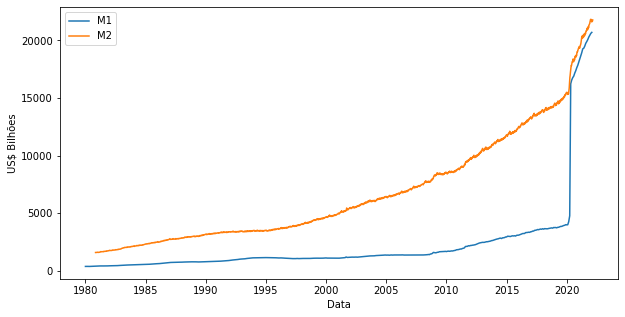

In [12]:
m1 = indicadores['M1SL']
m2 = indicadores['WM2NS']

grafico(m1, 'Data', 'US$ Bilhões', 'Agregados monetários', m2, 'M1', 'M2')

### Taxa de juros efetiva

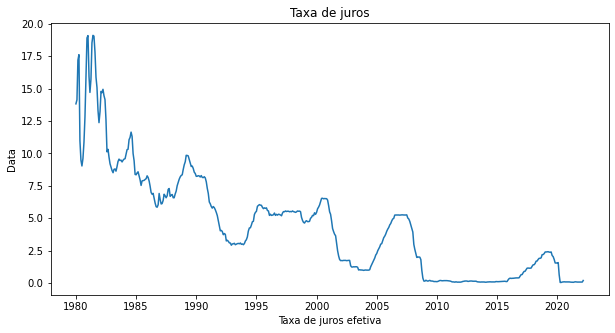

In [13]:
juros = indicadores['FEDFUNDS']
grafico(juros, 'Taxa de juros efetiva', 'Data', 'Taxa de juros')

**Função para alterar as datas de análise**

In [14]:
def alterar_data(series, data_inicio, data_fim):
    series = series.reset_index()
    series = series[series['DATE'] >= data_inicio]
    series = series[series['DATE'] <= data_fim]
    series.set_index('DATE', inplace = True)
    return series

**Função para gráficos com dois eixos y**

In [18]:
def eixo_secundario(dado1, dado2, label1, label2, xlabel, ylabel1, ylabel2, cor1 = 'blue', cor2 = 'red'):
    fig, ax = plt.subplots()
    plt.gcf().set_size_inches(10, 5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel1)
    plot1 = ax.plot(dado1.index, dado1, color = cor1, label = label1)

    ax2 = ax.twinx()
    ax2.set_ylabel(ylabel2)
    plot2 = ax2.plot(dado2.index, dado2, color = cor2, label = label2)

    lns = plot1 + plot2
    labels = [l.get_label() for l in lns]
    plt.legend(lns, labels, loc = 'best')
    return plt.show()

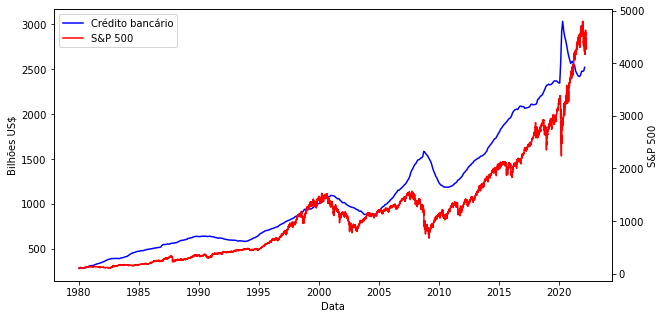

In [19]:
credito = indicadores['BUSLOANS']
sp500 = yahoo['^GSPC']

eixo_secundario(credito, sp500,'Crédito bancário', 'S&P 500', 'Data', 'Bilhões US$', 'S&P 500')

### Setor imobiliário

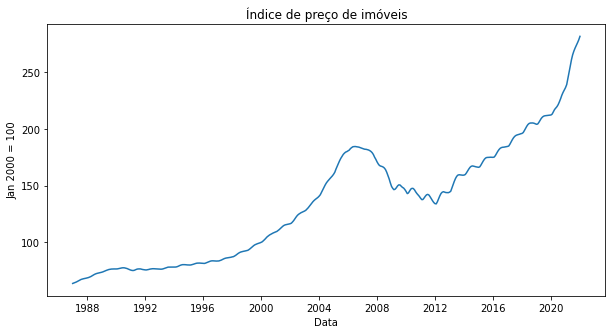

In [24]:
casa = indicadores['CSUSHPINSA']
grafico(casa, 'Data', 'Jan 2000 = 100', 'Índice de preço de imóveis')

# **Ciclo de títulos de empresas inadimplentes**

> O Ciclo de títulos de empresas inadimplentes apresenta um complemento do ciclo de crédito, no qual há momentos da economia em que haverá maior liquidez e em outros menor liquidez. Nos períodos de maior liquidez, há momentos em que empresas não tão saudáveis financeiramente decidem captar recursos por através de ferramente, e em período de inversão de ciclo, ou seja, menor liquidez, essas empresas podem sofrer maiores consequências e causar prejuízos a seus stakeholders.














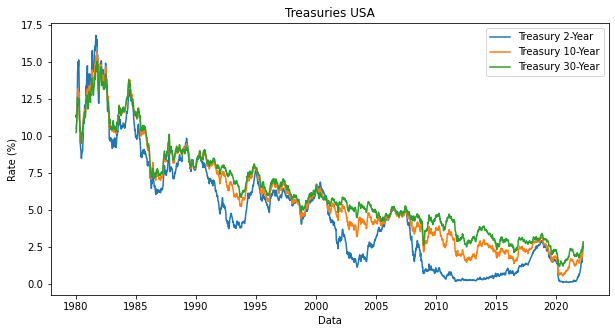

In [25]:
# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity (WGS2YR): https://fred.stlouisfed.org/series/WGS2YR
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (WGS10YR): https://fred.stlouisfed.org/series/WGS10YR
# Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity (WGS30YR): https://fred.stlouisfed.org/series/WGS30YR

YR2 = indicadores['WGS2YR']
YR10 = indicadores['WGS10YR']
YR30 = indicadores['WGS30YR']

plt.figure(figsize=(10,5))
plt.plot(YR2, label = "Treasury 2-Year")
plt.plot(YR10, label = 'Treasury 10-Year')
plt.plot(YR30, label = 'Treasury 30-Year')
plt.xlabel('Data')
plt.ylabel('Rate (%)')
plt.title("Treasuries USA")
plt.legend()
plt.show()


Observando o gráfico de Treasuries, capturamos as três treasuries, considerandas de curto, médio e longo prazo. Ao longo dos anos percebemos que as políticas monetárias dos EUA são mais assertivas, no sentido de que a inflação é mais controlada e os títulos americanos consequentemente possuem uma menor remuneração. 

Além disso, percebemos dois pontos relacionando com momentos de turbulência, o primeiro se dá a tendência de aumento das taxas por parte desses títulos, e grande variância dos títulos de menor prazo, como a Treasury de 2 anos. Outro ponto seria o fato de que em crises os títulos de diferentes prazos começam a apresentar taxas de remuneração semelhante. 

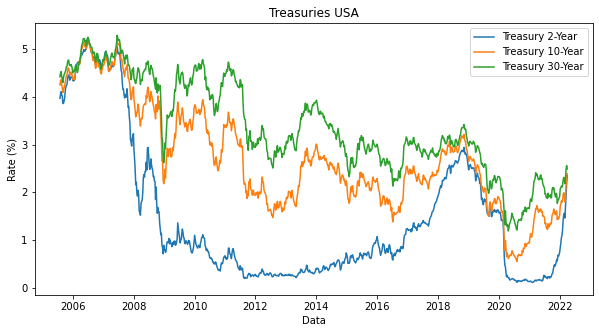

In [26]:
# Introdução do Cenário Global desde a década de 80. #

# Enfoque nos últimos 10 anos # 
a = alterar_data(YR2, '2005-07-25', '2022-04-05')
b = alterar_data(YR10, '2005-07-25', '2022-04-05')
c = alterar_data(YR30, '2005-07-25', '2022-04-05')

plt.figure(figsize=(10,5))
plt.plot(a, label = "Treasury 2-Year")
plt.plot(b, label = 'Treasury 10-Year')
plt.plot(c, label = 'Treasury 30-Year')
plt.xlabel('Data')
plt.ylabel('Rate (%)')
plt.title("Treasuries USA")
plt.legend()
plt.show()

Captando esse gráfico desde 2005, podemos observar que os títulos de longo prazo possuem maior remuneração, justamente por conta de uma maior duration e vencimento, ou seja, um maior risco diante a incerteza de cenário futuro. Já as Treasuries de 2 anos possuem a menor remuneração em períodos de estabilidade, por conta da sua menor duration e menor risco. 

No entanto, percebemos que em momentos que antecedem crises, as remuneração dos títulos ficam muito semelhantes, como ocorreu em 2008/2009. Atualmente, aparenta-se um movimento semelhante, no qual há uma abertura da curva de juros e remunerações semelhantes. 

**Títulos Privados**

É interessante ressaltar que no mercado de renda fixa, normalmente as remunerações de títulos estão relacionados ao seu risco. Por exemplo, uma empresa com mais de 100 bilhões de dólares em patrimônio líquido emite um título, enquanto outra com 1 bilhão de dólares emite um título, qual terá uma maior remuneração para pegar emprestado o dinheiro do stakeholder?
Provavelmente o título da empresa B dará maior remuneração ao stakeholder, como também haverá maior risco de *default*.

O Gráfico abaixo, foi extraído com base em diversos índices de mercado capturados pelo Bank of America. Foram extraídos 3 índices com base na classificação de rating dos títulos, sendo AAA mais saúdavel, e CCC o menos saúdavel financeiramente.


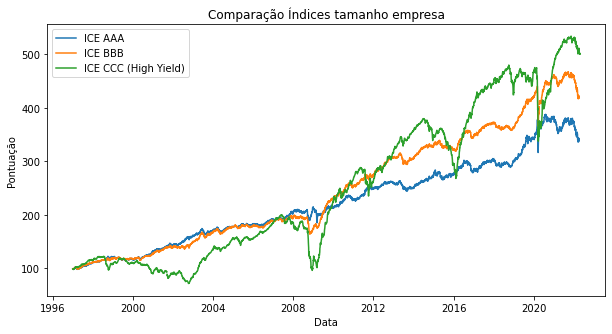

In [27]:
# ICE BofA AAA US Corporate Index Total Return Index Value (BAMLCC0A1AAATRIV): https://fred.stlouisfed.org/series/BAMLCC0A1AAATRIV
# ICE BofA BBB US Corporate Index Total Return Index Value (BAMLCC0A4BBBTRIV): https://fred.stlouisfed.org/series/BAMLCC0A4BBBTRIV
# ICE BofA CCC & Lower US High Yield Index Total Return Index Value (BAMLHYH0A3CMTRIV): https://fred.stlouisfed.org/series/BAMLHYH0A3CMTRIV

ICE_AAA = indicadores['BAMLCC0A1AAATRIV']
aaa = alterar_data(ICE_AAA, '1996-12-31', '2022-04-05')
aaa1 = 100*(aaa / aaa.iloc[0, :])

ICE_BBB = indicadores['BAMLCC0A4BBBTRIV']
bbb = alterar_data(ICE_BBB, '1996-12-31', '2022-04-05')
bbb1 = 100*(bbb / bbb.iloc[0, :])

ICE_CCC = indicadores['BAMLHYH0A3CMTRIV']

plt.figure(figsize=(10,5))
plt.plot(aaa1, label = 'ICE AAA')
plt.plot(bbb1, label = 'ICE BBB')
plt.plot(ICE_CCC, label = 'ICE CCC (High Yield)')

plt.xlabel('Data')
plt.ylabel('Pontuação')
plt.title("Comparação Índices tamanho empresa")
plt.legend()
plt.show()

# Insights muito interessantes #
# Menor volatilidade em índices mais seguros em períodos de crise #
# Embora mais volateis, a longo prazo possuem maior rentabilidade #


Esse gráfico elabora pelo Bank of America representa a composição de títulos de dívidas de empresas emitidos no mercado norte-americano, de acordo com o seu risco.

Observando o gráfico desde a sua origem, percebemos que a longo prazo, os títulos de High Yield maiores retornos, mas a curto prazo a maior volatilidade. Além disso, os índice AAA apresenta uma menor volatilidade em momentos de crise e também a longo prazo um menor crescimento comparando com os outros.

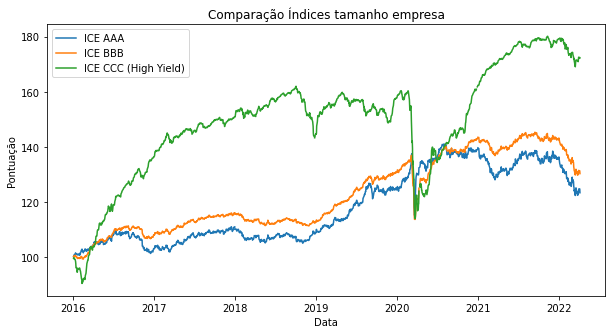

In [28]:
# ICE BofA AAA US Corporate Index Total Return Index Value (BAMLCC0A1AAATRIV): https://fred.stlouisfed.org/series/BAMLCC0A1AAATRIV
# ICE BofA BBB US Corporate Index Total Return Index Value (BAMLCC0A4BBBTRIV): https://fred.stlouisfed.org/series/BAMLCC0A4BBBTRIV
# ICE BofA CCC & Lower US High Yield Index Total Return Index Value (BAMLHYH0A3CMTRIV): https://fred.stlouisfed.org/series/BAMLHYH0A3CMTRIV

ICE_AAA = indicadores['BAMLCC0A1AAATRIV']
aaa = alterar_data(ICE_AAA, '2015-12-31', '2022-04-05')
aaa1 = 100*(aaa / aaa.iloc[0, :])

ICE_BBB = indicadores['BAMLCC0A4BBBTRIV']
bbb = alterar_data(ICE_BBB, '2015-12-31', '2022-04-05')
bbb1 = 100*(bbb / bbb.iloc[0, :])

ICE_CCC = indicadores['BAMLHYH0A3CMTRIV']
ccc = alterar_data(ICE_CCC, '2015-12-31', '2022-04-05')
ccc1 = 100*(ccc / ccc.iloc[0, :])

plt.figure(figsize=(10,5))
plt.plot(aaa1, label = 'ICE AAA')
plt.plot(bbb1, label = 'ICE BBB')
plt.plot(ccc1, label = 'ICE CCC (High Yield)')

plt.xlabel('Data')
plt.ylabel('Pontuação')
plt.title("Comparação Índices tamanho empresa")
plt.legend()
plt.show()

# Insights muito interessantes #
# Menor volatilidade em índices mais seguros em períodos de crise #
# Embora mais volateis, a longo prazo possuem maior rentabilidade #


Captando os últimos anos, percebemos que um grande deslocamento do Índice CCC (High Yield) pode se dar pois os títulos estão oferecendo uma maior remuneração, ou seja, um acesso a crédito mais fácil e com maior risco ao investidor. Além disso, percebemos que esse grande deslocamento pode ocasionar futuramente uma grande volatilidade nos títulos mais arriscados enquanto os índices mais seguros tiveram pouca volatilidade em crises, conforme mostrando no período pandêmico. 

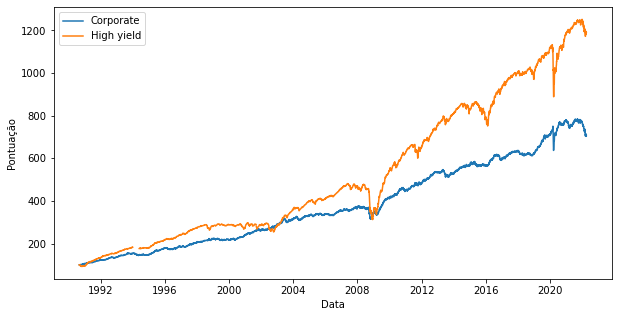

In [33]:
# ICE BofA US High Yield Index Total Return Index Value (BAMLHYH0A0HYM2TRIV): https://fred.stlouisfed.org/series/BAMLHYH0A0HYM2TRIV
# ICE BofA US Corporate Index Total Return Index Value (BAMLCC0A0CMTRIV): https://fred.stlouisfed.org/series/BAMLCC0A0CMTRIV

High_Yield = indicadores['BAMLHYH0A0HYM2TRIV']
hgy = alterar_data(High_Yield, '1990-08-31', '2022-04-05')
hgy1 = 100*(hgy / hgy.iloc[0, :])

Corporate = indicadores['BAMLCC0A0CMTRIV']
corp = alterar_data(Corporate, '1990-08-31', '2022-04-05')
corp1 = 100*(corp / corp.iloc[0, :])

grafico(corp1, 'Data', 'Pontuação', 'Comparação Índices tamanho empresa', hgy1, 'Corporate', 'High yield')
# High Yield apresenta uma maior volatilidade, mas a longo prazo é mais rentável #

Concluindo, podemos captar alguns insights:
Conforme é discutido na academicamente os títulos de High Yield, empresas menores e mais instáveis apresentam um maior remuneração a longo prazo, no entanto, a curto prazo uma maior volatilidade. Sendo desde a criação do índice na década de 90, cresceu mais de 11 vezes.

Em comparação com o Corporate, voltando para empresas de grande prazo, é o inverso da situação, mostrando que ocorre uma menor volatilidade em períodos de crise, mas um menor retorno a longo prazo. Sendo desde a criação do índice na década de 90, cresceu mais de 7 vezes.

# **Ciclo de Mercado**

> Após analisarmos os principais ciclos, podemos discorrer sobre o ciclo de Mercado. Podemos dizer que o ciclo de mercado é a junção de outros ciclos discorridos ao longo do artigo com finanças comportamentes, ou seja, o comportamento do investidor ao tomar decisões. 
É possível sentir o comportamento dos investidores com alguns índices, nos quais serão mostrados a frente:





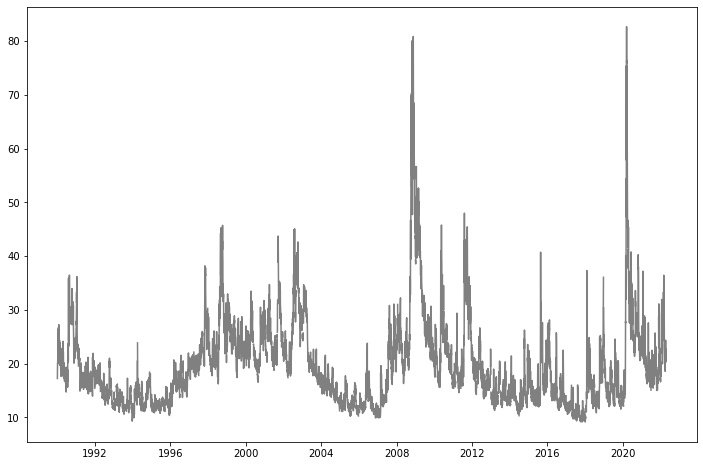

In [35]:
VIX = indicadores['VIXCLS']
plt.figure(figsize=(12,8))
plt.plot(VIX, color="grey")
plt.show()

Primeiramente, apresentamos o VIX Index, esse índice acompanha o desempenho dos 
contratos futuros que são liquidados em relação ao VIX, o CBOE Volatility e a 
principal medida de volatilidade esperada no mercado de valores, implícita nas opções do S&P 500. Conhecido pelos investidores como "Índice do Medo", ela possui grande volatilidade em períodos turbulentos, usado até como indicador da percepção dos investidores. 

Podemos observar que esse índice atingiu suas máximos em períodos turbulentos, como a crise da "Bolha.com", a Crise de 2009 e a pandemia do Covid-19.



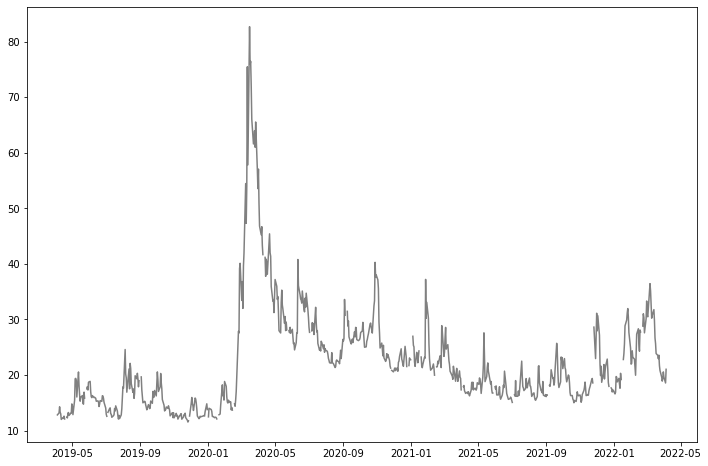

In [36]:
VIX = indicadores['VIXCLS']
vix1 = alterar_data(VIX, '2019-04-05', '2022-04-05')
plt.figure(figsize=(12,8))
plt.plot(vix1, color="grey")
plt.show()


Captando os últimos 3 anos, percebemos que o grande auge de medo desse índice foi o surgimento de casos de Covid-19 em diversos países simultaneamente, causando grande medo por parte dos investidores. Após esse período, houve uma menor percepção de medo por parte dos investidores, devido a retomada econonômica e injeção de recursos monetários por parte do Banco Central. A inversão de percepção de medo se deu a partir da preocupação em relação a inflação de diversos países desenvolvidos, e ainda atualmente (abril de 2022) segue o índice em alta e a inflação também.

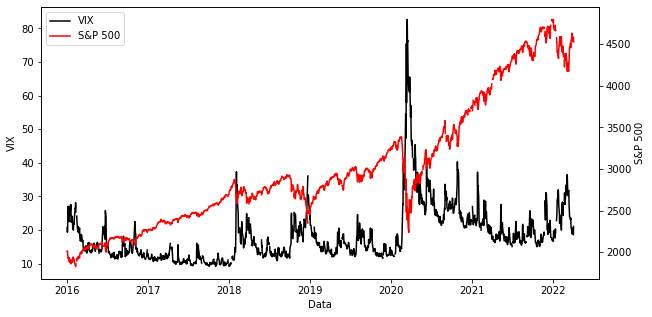

In [44]:
# Crude Oil Prices: Brent - Europe (DCOILBRENTEU): https://fred.stlouisfed.org/series/DCOILBRENTEU 
# S&P 500 (SP500): https://fred.stlouisfed.org/series/SP500 #

SP500 = indicadores['SP500']
sp_500 = alterar_data(SP500, '2015-12-31', '2022-04-05')

VIX = indicadores['VIXCLS']
vix_a = alterar_data(VIX, '2015-12-31', '2022-04-05')

eixo_secundario(vix_a, sp_500, 'VIX', 'S&P 500', 'Data', 'VIX', 'S&P 500', cor1 = 'black', cor2 = 'red')

Conjuntamente com o VIX Index com o S&P 500, podemos observar a sua correlação com o índice, no qual em momentos que o índice apresenta tendência de baixa, o S&P 500 apresenta tendência de alta.

Isto nos mostra que quando os investidores estão mais propensos a tomar risco, há um maior investimento em renda variável. 

Os investidores de ações possuem a oportunidade de investimento de empresas de diversos portes, desde a Micro-Cap até a Large-Cap, por isso captamos os Índices "Wilshires US Total Market Index". Estes índices são divididos em quadro através do tamanho de porte de empresa, sendo em ordem crescente: Micro-Cap, Mid-Cap, Small-Cap e Large-Cap. Assim, o índice tem em sua composição empresas que se adequam aos requisitos. 



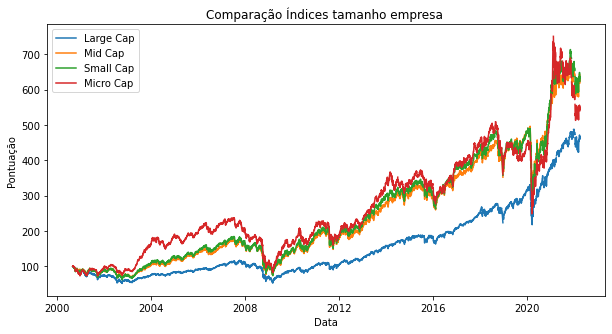

In [45]:
# Wilshire US Small-Cap Total Market Index (WILLSMLCAP): https://fred.stlouisfed.org/series/WILLSMLCAP
# Wilshire US Large-Cap Total Market Index (WILLLRGCAP): https://fred.stlouisfed.org/series/WILLLRGCAP
# Wishire US Micro-Cap Total Market Index (WILLMICROCAP): https://fred.stlouisfed.org/series/WILLMICROCAP
# Wilshire US Mid-Cap Total Market Index (WILLMIDCAP): https://fred.stlouisfed.org/series/WILLMIDCAP


Large_Cap = indicadores['WILLLRGCAP']
lc = alterar_data(Large_Cap, '2000-08-31', '2022-04-05')
lc1 = 100*(lc / lc.iloc[0, :])

Mid_Cap = indicadores['WILLMIDCAP']
mdc = alterar_data(Mid_Cap, '2000-08-31', '2022-04-05')
mdc1 = 100*(mdc / mdc.iloc[0, :])

Small_Cap = indicadores['WILLSMLCAP']
sml = alterar_data(Small_Cap, '2000-08-31', '2022-04-05')
sml1 = 100*(sml / sml.iloc[0, :])

Micro_Cap = indicadores['WILLMICROCAP']
mcp = alterar_data(Micro_Cap, '2000-08-31', '2022-04-05')
mcp1 = 100*(mcp / mcp.iloc[0, :])

plt.figure(figsize=(10,5))
plt.plot(lc1, label = "Large Cap")
plt.plot(mdc1, label = 'Mid Cap')
plt.plot(sml1, label = 'Small Cap')
plt.plot(mcp1, label = 'Micro Cap')
plt.xlabel('Data')
plt.ylabel('Pontuação')
plt.title("Comparação Índices tamanho empresa ")
plt.legend()
plt.show()


Ao longo prazo, enxergamos alguns "insights" interessantes:

O primeiro seria a grande similaridade de comportamento a longo prazo de empresas de menores tamanhos em períodos de crescimentos, no qual são as que mais destacam e possuem movimentos parecidos. 

O segundo insight é observar a volatilidade de cada índice, mostrando que de fato a teoria está correta, as empresas de menor porte tende a ser mais voláteis do que as Large-Cap. 

O terceiro insight é observar o crescimento desses índices, em que apesar da grande volatilidade a curto prazo dos índices de pequeno porte, eles apresentaram uma maior rentabilidade do que as empresas de grande porte. Assim, conforme a teoria nos relata e pode ser comprovada com esse gráfico, a empresas menores a curto prazo possuem menor volatilidade, mas a longo prazo tendem a possuir maior retorno, já que há mais "market-share" a se conquistar. 



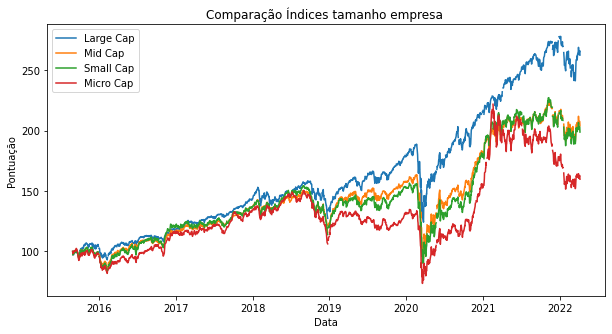

In [46]:
# Wilshire US Small-Cap Total Market Index (WILLSMLCAP): https://fred.stlouisfed.org/series/WILLSMLCAP
# Wilshire US Large-Cap Total Market Index (WILLLRGCAP): https://fred.stlouisfed.org/series/WILLLRGCAP
# Wilshire US Micro-Cap Total Market Index (WILLMICROCAP): https://fred.stlouisfed.org/series/WILLMICROCAP
# Wilshire US Mid-Cap Total Market Index (WILLMIDCAP): https://fred.stlouisfed.org/series/WILLMIDCAP


Large_Cap = indicadores['WILLLRGCAP']
lc = alterar_data(Large_Cap, '2015-08-31', '2022-04-05')
lc1 = 100*(lc / lc.iloc[0, :])

Mid_Cap = indicadores['WILLMIDCAP']
mdc = alterar_data(Mid_Cap, '2015-08-31', '2022-04-05')
mdc1 = 100*(mdc / mdc.iloc[0, :])

Small_Cap = indicadores['WILLSMLCAP']
sml = alterar_data(Small_Cap, '2015-08-31', '2022-04-05')
sml1 = 100*(sml / sml.iloc[0, :])

Micro_Cap = indicadores['WILLMICROCAP']
mcp = alterar_data(Micro_Cap, '2015-08-31', '2022-04-05')
mcp1 = 100*(mcp / mcp.iloc[0, :])

plt.figure(figsize=(10,5))
plt.plot(lc1, label = "Large Cap")
plt.plot(mdc1, label = 'Mid Cap')
plt.plot(sml1, label = 'Small Cap')
plt.plot(mcp1, label = 'Micro Cap')
plt.xlabel('Data')
plt.ylabel('Pontuação')
plt.title("Comparação Índices tamanho empresa ")
plt.legend()
plt.show()

# Bizarro, que no curto prazo o Large cresceu mais (???)

Captando os últimos, indo em direção a uma visão de curto a médio prazo, percebemos que quem se destacou no período foi as empresas Large Cap, e quem apresentou as maiores volatilidades são as menores empresas. 
Percebemos que houve um deslocamento de retorno em relação as empresas foi a partir do surgimento de momentos de volatilidade, por exemplo em 2019 (crises políticas do governo Trump) e 2020 (Pandemia Covid-19). Nestes dois períodos, os investidores de certa forma decidiram aportar em ativos mais seguros e estáveis com o intuito de se proteger das crises, no caso a Large Cap, que na teoria também tende a sofrer menos externalidades. 

Text(0, 0.5, '3-Month Volatility S&P 500')

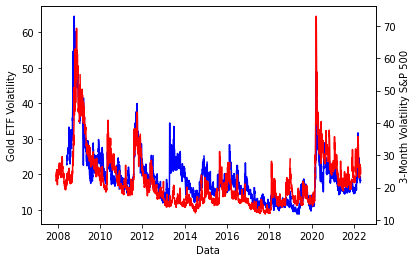

In [50]:
# CBOE Gold ETF Volatility Index (GVZCLS): https://fred.stlouisfed.org/series/GVZCLS
# CBOE S&P 500 3-Month Volatility Index (VXVCLS): https://fred.stlouisfed.org/series/VXVCLS

Gold_Etf = indicadores['GVZCLS']
Vol_SP500 = indicadores['VXVCLS']

fig, ax = plt.subplots()
ax.plot(Gold_Etf.index, Gold_Etf, color = 'blue')  
ax.set_xlabel('Data')
ax.set_ylabel('Gold ETF Volatility')

ax2 = ax.twinx()
ax2.plot(Vol_SP500.index, Vol_SP500, color = 'red')
ax2.set_ylabel('3-Month Volatility S&P 500')

# Dá para dizer que a volatilidade do S&P 500 está relacionada com a volatilidade do preço do ouro (?) #

O Ouro é considerado um ativo seguro pelos investidores em momentos de crise, assim, há uma migração de ativos de risco para o ouro. Neste gráfico, percebemos que há uma grande correlação da variação do preço de ouro com a volatilidade do ouro, concluindo que em momentos de grande incerteza, o investidores tentam se proteger comprando ouro, aumentando o seu preço e tendo uma maior variação. 

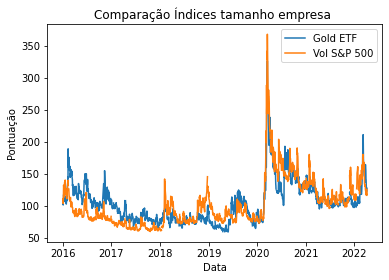

In [48]:
# CBOE Gold ETF Volatility Index (GVZCLS): https://fred.stlouisfed.org/series/GVZCLS
# CBOE S&P 500 3-Month Volatility Index (VXVCLS): https://fred.stlouisfed.org/series/VXVCLS

Gold_Etf = indicadores['GVZCLS'] 
gdf = alterar_data(Gold_Etf, '2015-12-31', '2022-04-05')
gdf1 = 100*(gdf / gdf.iloc[0, :])  # Aqui uma hora estava 'lc' ao invés de 'gdf', não sei se foi um bug


Vol_SP500 = indicadores['VXVCLS']
volsp = alterar_data(Vol_SP500, '2015-12-31', '2022-04-05')
volsp1 = 100*(volsp / volsp.iloc[0, :])

plt.plot(gdf1, label = 'Gold ETF')
plt.plot(volsp1, label = 'Vol S&P 500')
plt.xlabel('Data')
plt.ylabel('Pontuação')
plt.title("Comparação Índices tamanho empresa ")
plt.legend()
plt.show()

# Se pá ficou muito melhor o outro gráfico (de cima no caso)

In [ ]:

# https://fred.stlouisfed.org/series/WILL5000PRFC

# **Referências**

https://www.investopedia.com/terms/f/fear-and-greed-index.asp#:~:text=The%20fear%20and%20greed%20index%20is%20measured%20on%20a%20daily,to%20have%20the%20opposite%20effect.
https://www.mfpoint.com.au/market-updates/measuring-fear-and-greed-on-wall-street

**Esse artigo tem bons insights**
https://pythoninvest.com/long-read/macro-indicators-affecting-stock-market  
https://github.com/realmistic/PythonInvest-basic-fin-analysis/blob/mastercolab_notebooks/Part9_Macro_Indicators_vs_Stock_Indexes_Growth.ipynb  # Código no github

